In [11]:
import matplotlib.pyplot as plt
% matplotlib inline

In [12]:
import random

class Dice:

    def roll(self):
        roll = random.randint(1,6)
        return roll


class Opponent:

    def __init__(self, name = "Pig Opponent"):
        self.dice = Dice()
        self.score = 0
        self.total_score = 0
        self.count = 0
        self.name = name
        
    def __str__(self):
        return self.name

    def roll(self):
        return self.dice.roll()

    def round_score(self):
        roll = self.roll()
        if roll > 1:
            self.score += roll
        else:
            self.score = 0

        return self.score

    def roll_or_hold(self):
        response = self.decision()
        self.decision()
        if response == 'hold':

            self.total_score += self.score
            self.score = 0
            self.count = 0
            return self.total_score
        elif response == 'roll':

            self.round_score()

            return self.roll_or_hold()
        elif response == 'bust':

            self.count = 0
            return self.total_score

    def decision(self):
        if self.count > 0:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"


class Player:

    def __init__(self):
        self.dice = Dice()
        self.score = 0
        self.total_score = 0
        self.count = 0

    def roll(self):
        return self.dice.roll()

    def round_score(self):
        roll = self.roll()
        if roll > 1:
            self.score += roll
        else:
            self.score = 0
        return self.score

    def roll_or_hold(self):
        if self.score == 0 and self.count > 0:
            print(self.count)
            print("You bust")
            self.count = 0
            return self.total_score
        else:
            response = input(
            "\nDo you want to roll or hold? (Roll/Hold)".lower())
            if response == 'hold':
                print("You hold")
                self.total_score += self.score
                self.score = 0
                self.count = 0
                return self.total_score
            if response == 'roll':
                print("You roll")
                self.round_score()
                print("your score this round: ", self.score)
                print("your total score: ", self.total_score)
                self.count += 1
                return self.roll_or_hold()
            
class Game:

    def __init__(self):
        self.p1 = PigMoves21()
        self.p2 = PigMoves20()
        self.round_count = 0

    def p1_turn(self):
        self.p1.roll_or_hold()

    def p2_turn(self):
        self.p2.roll_or_hold()

    def play_round_me(self):
            self.p1_turn()
            self.p2_turn()

    def play_round_you(self):
            self.p2_turn()
            self.p1_turn()

    def full_game(self):
        while self.round_count < 7:
            self.play_round_me()
            self.round_count += 1
        if self.p1.total_score > self.p2.total_score:
            return "{} BEATS {}! Final score is {}, to {}.".format(
            self.p1, self.p2, self.p1.total_score, self.p2.total_score)
        else:
            return "{} BEATS {}! Final score is {}, to {}.".format(
            self.p2, self.p1, self.p1.total_score, self.p2.total_score)

In [22]:
class FullGame(Game):
    
    def full_game(self):
        while self.p1.total_score <= 100 and self.p2.total_score <= 100:
            self.play_round_me()
            self.round_count += 1
        if self.p1.total_score > self.p2.total_score:
            return 1
        elif self.p1.total_score < self.p2.total_score:
            return 2
        elif self.p1.total_score == self.p2.total_score:
            return 3
        
    def game_scores(self):
        return self.p1.total_score, self.p2.total_score

In [23]:
class PigMoves18(Opponent):

    def decision(self):
        if self.score >= 18:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"

class PigMoves19(Opponent):

    def decision(self):
        if self.score >= 19:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"

class PigMoves20(Opponent):

    def decision(self):
        if self.score >= 20:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"
        
class PigMoves21(Opponent):

    def decision(self):
        if self.score >= 21:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"

In [24]:
def pig_trials(number = 10):
    game_wins = []
    final_score = []
    for num in range(number):
        game = FullGame()
        game_wins.append(game.full_game())
        final_score.append(game.game_scores())
    return game_wins, final_score

In [25]:
trial_results = []
score_results = []
for number in [10, 100, 1000, 10000, 100000]:
    trial_results.append(pig_trials(number)[0])
    score_results.append(pig_trials(number)[1])

In [26]:
average_p1 = 0
average_p2 = 0
trials_average = []

for trials in score_results:
    average_p1 = 0
    average_p2 = 0
    for scores in trials:
        average_p1 += scores[0]
        average_p2 += scores[1]
    average_p1 = average_p1/len(trials)
    average_p2 = average_p2/len(trials)
    trials_average.append((average_p1, average_p2))

In [27]:
one = 0
two = 0
tie = 0
total_results = []
for results in trial_results:
    one = 0
    two = 0
    tie = 0
    one += results.count(1)
    two += results.count(2)
    tie += results.count(3)
    total_results.append([one, two, tie])

# 19 count vs 20 count

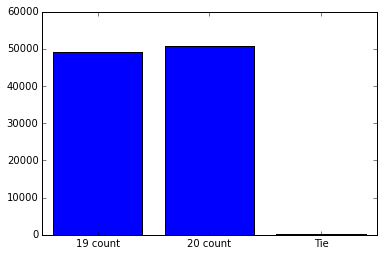

In [9]:
y = total_results[4]
x = range(len(y))
z = "19 count", "20 count", "Tie"

plt.bar(x, y, align = "center")
plt.xticks([0,1,2], z)

fig = plt.gcf()

# 19 count vs 20 count

In [10]:
trials_average[4]

(86.9517, 87.19119)

# 21 count vs 20 count

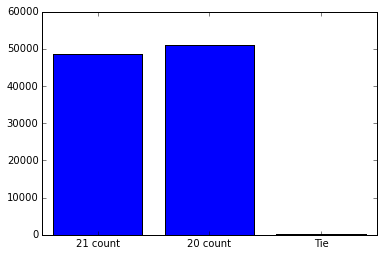

In [28]:
y = total_results[4]
x = range(len(y))
z = "21 count", "20 count", "Tie"

plt.bar(x, y, align = "center")
plt.xticks([0,1,2], z)

fig = plt.gcf()

# 21 count vs 20 count average

In [29]:
trials_average[4]

(89.15517, 89.27046)

The data seems to line up with my earlier hypothesis. If you reach twenty and bank it you will have an increased chance to win the game.